In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/Micro-Credit-Project--1-/Data file.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [87]:
df.info()
## Looks like there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

### EDA

In [88]:
df.describe()


,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


### Undrstanding the data clumns

Unnamed-drop-Unnamed

Label-imbalance

msisdn- drop, mobile Number-change to int

aon-Number of days on Nework-Average age being 22-The max value is equal to 2739 years on cellular networks, Which is impossible-Check on annomylies in this column and Min being -49 days age?

daily_decr30, daily_decr90,rental30	, rental90- The amount spent on max looks far beyond the average and negative amount spending on recharge is not possible

last_rech_date_ma, last_rech_date_da- The Number of days for any rechange cannot be max in so high as max value, corresponding to 2736 years

r_ma_rech30	sumamnt_ma_rech30	medianamnt_ma_rech30	medianmarechprebal30, -The amount to rechange canot be 0

Same as in for 90 dayds

pdate-need a change in datatyp

maxamnt_loans30	- max value looks anomy as median for the same dat ais not in same bracket

In [89]:
df.shape

(209593, 37)

In [90]:
# DATA CLEANING

In [91]:
## Drop columns which do ot add value to the data set
df=df.drop(columns=['Unnamed: 0','msisdn'])


In [92]:
import datetime
#Column 1(Data of Journey)
df['pdate']= pd.to_datetime(df['pdate'], format="%Y/%m/%d")
df['pdate_Year'] = df['pdate'].map(lambda x: x.year)
df['pdate_Month'] = df['pdate'].map(lambda x: x.month)
df['pdate_day'] = df['pdate'].map(lambda x: x.day)
df=df.drop(columns=['pdate'])

#Define the data type of data column

In [93]:
df['pcircle'].unique()
# As there all the data is all from same telecom circle 

array(['UPW'], dtype=object)

In [94]:
df=df.drop(columns=['pcircle'])

ValueError: num must be 1 <= num <= 15, not 16

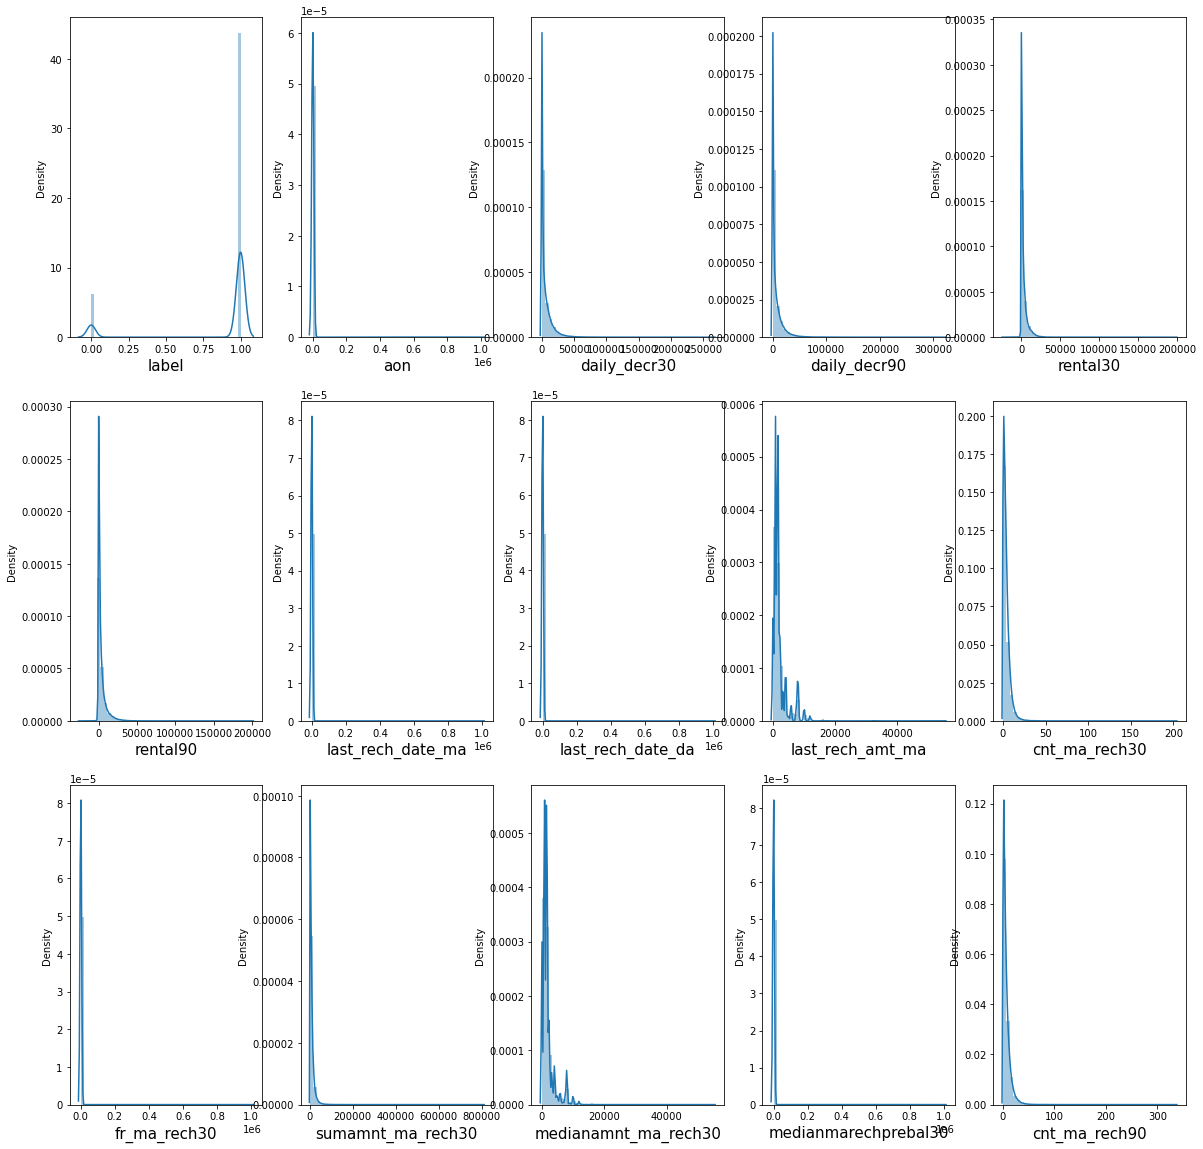

In [95]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=30:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()  

### All the data looks very much screwed.
### Before I treat the screwness I would drop the correlated values.


In [96]:
corr=df.corr()
corr.shape

(36, 36)

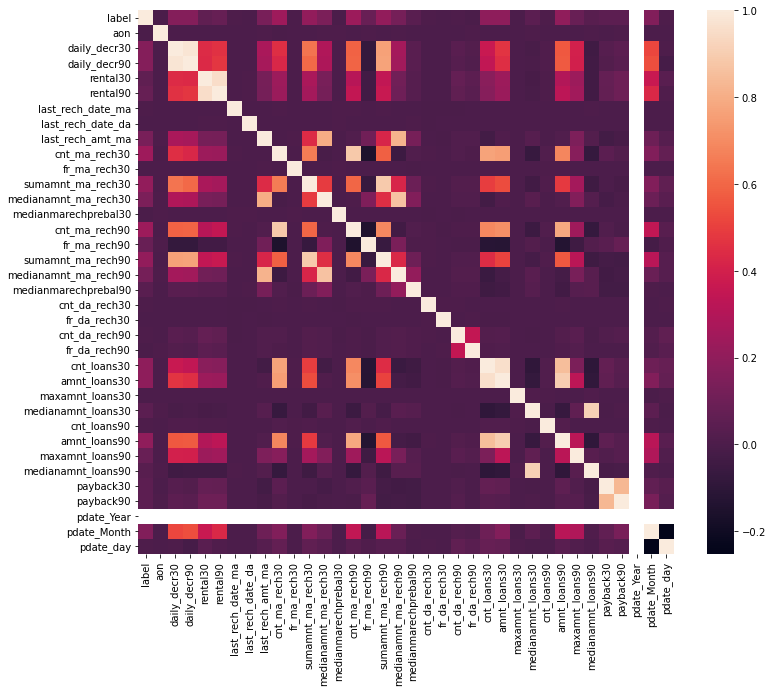

In [97]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=False)
plt.show()

#The lighter colors shows that some of the comumns are correlated

In [98]:
corr
## Looking into this data, It seems that all the features correlation to the Label is very less

## there explain very less when there stand alone
## Multidementionally the Label is defined

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_Year,pdate_Month,pdate_day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,NaN,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,NaN,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,NaN,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,NaN,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,NaN,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,NaN,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,NaN,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,NaN,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,NaN,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,NaN,0.156148,0.068643


In [99]:
##rental30 very strongly correlated with rental 90
## payback 90 is very closly related to rental 90
#daily_decr30-daily_decr90


### SELCTING BEST BEST BASED ON VIF AND SELECT BEST K

In [100]:
## To check for th multicollinearity 

x=df.drop(columns=['label'],axis=1)
y=df['label']

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                 feature         VIF
0                    aon    1.000189
1           daily_decr30   29.675408
2           daily_decr90   32.354935
3               rental30   13.288008
4               rental90   14.167405
5      last_rech_date_ma    1.000149
6      last_rech_date_da    1.000133
7       last_rech_amt_ma    3.431607
8          cnt_ma_rech30   15.032371
9           fr_ma_rech30    1.000143
10     sumamnt_ma_rech30   12.763806
11  medianamnt_ma_rech30    5.078524
12  medianmarechprebal30    1.000144
13         cnt_ma_rech90   16.472118
14          fr_ma_rech90    1.069753
15     sumamnt_ma_rech90   15.202512
16  medianamnt_ma_rech90    5.635002
17  medianmarechprebal90    1.065788
18         cnt_da_rech30    1.000202
19          fr_da_rech30    1.000175
20         cnt_da_rech90    1.149464
21          fr_da_rech90    1.140511
22           cnt_loans30   23.332632
23          amnt_loans30   29.432620
24       maxamnt_loans30    1.000181
25    medianamnt_loans30    6.030172
2

In [ ]:
#daily_decr 30 and 90 loks to ave multicollinearity
#rental 30  and 90
#cnt_ma_rech30, sumamnt_ma_rech30, cnt_ma_rech90,sumamnt_ma_rech90 ,cnt_loans30 ,amnt_loans30 ,medianamnt_loans30, amnt_loans90, medianamnt_loans90   pdate_Year 

In [101]:
#Would check for the best features and delet accordingly
#Will check which variable is more likely to drop
#As there is lot of Multicollinearily I will use Top 3 features 
from sklearn.feature_selection import SelectKBest, f_classif
best_features=SelectKBest(score_func=f_classif, k=10)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feaures_scores=pd.concat([df_scores,df_columns], axis=1)
feaures_scores.columns=['Score','feature Name']
feaures_scores.sort_values(['Score'], ascending=False)

,Score,feature Name
8,12510.083303,cnt_ma_rech30
13,12405.460816,cnt_ma_rech90
15,9268.913603,sumamnt_ma_rech90
10,8992.357422,sumamnt_ma_rech30
27,8713.713240,amnt_loans90
23,8486.771736,amnt_loans30
22,8398.510078,cnt_loans30
1,6109.541601,daily_decr30
2,5950.192201,daily_decr90
33,5155.893648,pdate_Month


In [102]:
test_col=pd.DataFrame({})
test_col['daily_decr30']=df['daily_decr30']
test_col['daily_decr90']=df['daily_decr90']
test_col['rental30']=df['rental30']
test_col['rental90']=df['rental90']
test_col['cnt_ma_rech30']=df['cnt_ma_rech30']
test_col['sumamnt_ma_rech30']=df['sumamnt_ma_rech30']
test_col['sumamnt_ma_rech90']=df['sumamnt_ma_rech90']
test_col['cnt_loans30']=df['cnt_loans30']
test_col['amnt_loans30']=df['amnt_loans30']
test_col['medianamnt_loans30']=df['medianamnt_loans30']
test_col['amnt_loans90']=df['amnt_loans90']
test_col['medianamnt_loans90']=df['medianamnt_loans90']
test_col.head()


,daily_decr30,daily_decr90,rental30,rental90,cnt_ma_rech30,sumamnt_ma_rech30,sumamnt_ma_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,medianamnt_loans90
0,3055.050000,3065.150000,220.13,260.13,2,3078.0,3078,2,12,0.0,12,0.0
1,12122.000000,12124.750000,3691.26,3691.26,1,5787.0,5787,1,12,0.0,12,0.0
2,1398.000000,1398.000000,900.13,900.13,1,1539.0,1539,1,6,0.0,6,0.0
3,21.228000,21.228000,159.42,159.42,0,0.0,947,2,12,0.0,12,0.0
4,150.619333,150.619333,1098.90,1098.90,7,20029.0,23496,7,42,0.0,42,0.0


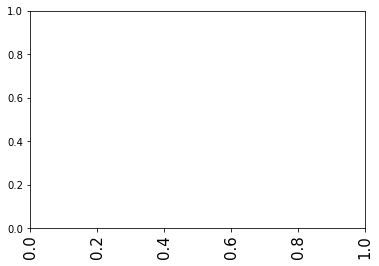

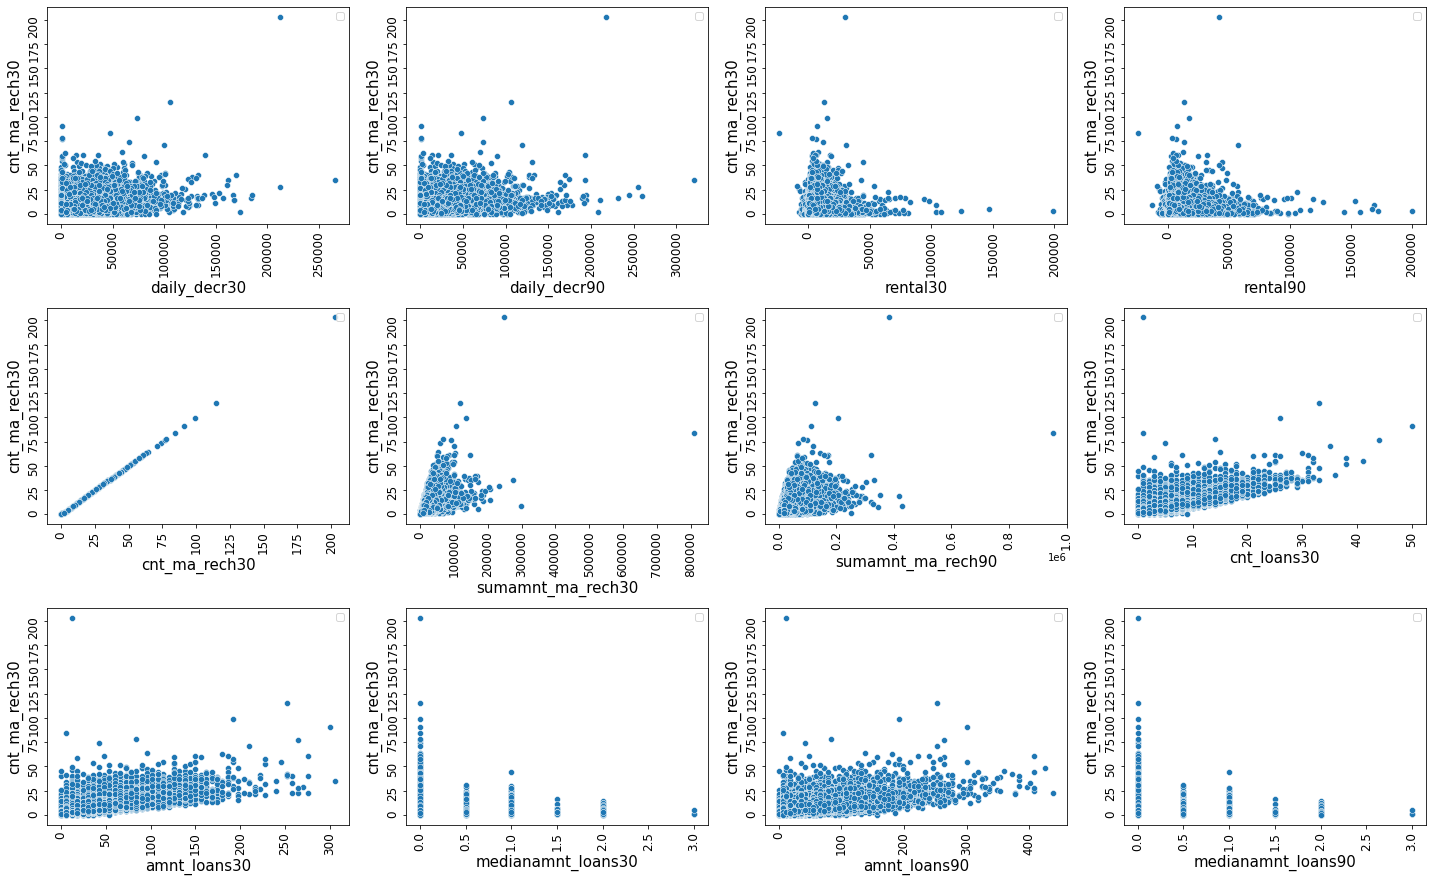

In [104]:
## checking with 1st best K value
#o check if we can import this data based on any other columns, Plots seeing the correlation of the column with best describing features got from best K

plt.xticks(size=15, rotation=90)
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in test_col:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        
        sns.scatterplot(x=test_col[column], y=test_col['cnt_ma_rech30'],data=test_col)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('cnt_ma_rech30',fontsize=15)
        plt.xticks(size=12, rotation=90)
        plt.yticks(size=12, rotation=90)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 

In [112]:
## would drop dairly_decor90, amnt_loans30, amt_loan 90,cnt_loans30
df=df.drop(columns=['daily_decr90', 'amnt_loans30', 'amnt_loans90','cnt_loans30'],axis=1)
test_col=test_col.drop(columns=['daily_decr90', 'amnt_loans30', 'amnt_loans90','cnt_loans30'],axis=1)

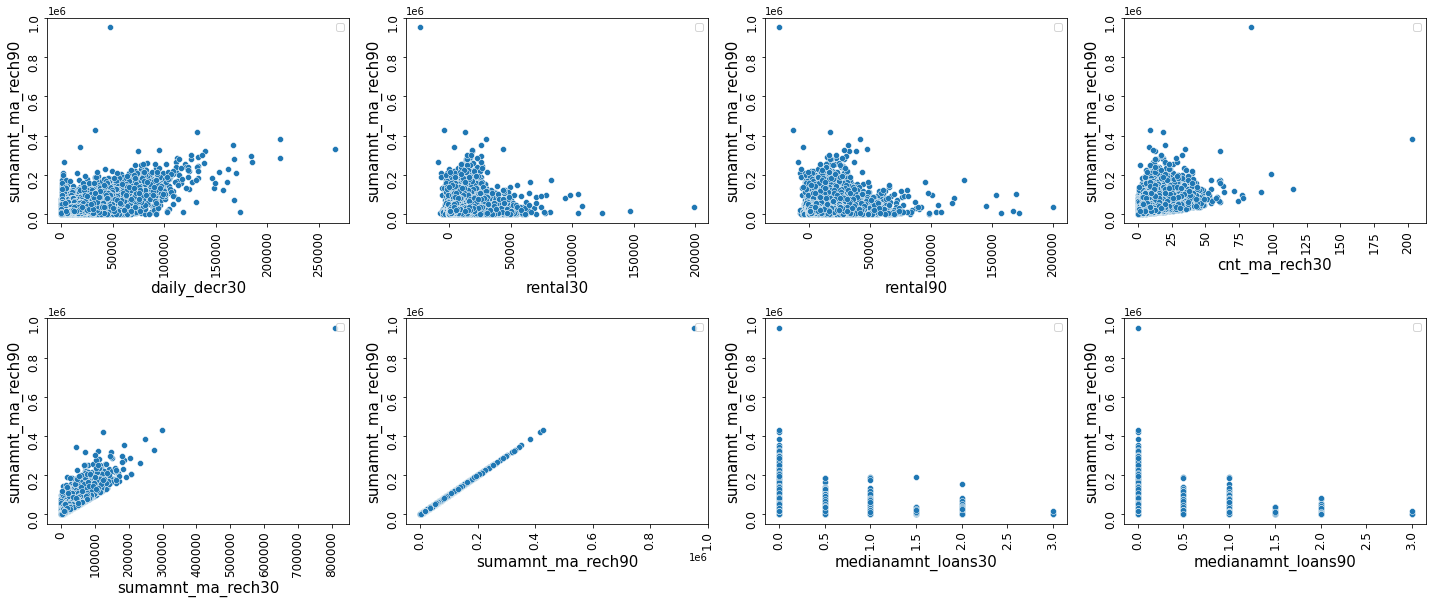

In [113]:
## 2nd best K value
#To check if we can import this data based on any other columns, Plots seeing the correlation of the column with best describing features got from best K
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in test_col:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        
        sns.scatterplot(x=test_col[column], y=test_col['sumamnt_ma_rech90'],data=test_col)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('sumamnt_ma_rech90',fontsize=15)
        plt.xticks(size=12, rotation=90)
        plt.yticks(size=12, rotation=90)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 

In [115]:
# Will drop daily_decr30, rental 90,sumamnt_ma_rech30
df=df.drop(columns=['daily_decr30', 'rental90','sumamnt_ma_rech30'],axis=1)

In [116]:
df.head()

,label,aon,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_Year,pdate_Month,pdate_day
0,0,272.0,220.13,2.0,0.0,1539,2,21.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,6.0,0.0,2.0,6,0.0,29.000000,29.000000,2016,7,20
1,1,712.0,3691.26,20.0,0.0,5787,1,0.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,12.0,0.0,1.0,12,0.0,0.000000,0.000000,2016,8,10
2,1,535.0,900.13,3.0,0.0,1539,1,0.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,6.0,0.0,1.0,6,0.0,0.000000,0.000000,2016,8,19
3,1,241.0,159.42,41.0,0.0,947,0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,6.0,0.0,2.0,6,0.0,0.000000,0.000000,2016,6,6
4,1,947.0,1098.90,4.0,0.0,2309,7,2.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,6.0,0.0,7.0,6,0.0,2.333333,2.333333,2016,6,22


In [117]:
### VIF, reconfirmation
x=df.drop(columns=['label'],axis=1)
y=df['label']

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                 feature         VIF
0                    aon    1.000160
1               rental30    1.277829
2      last_rech_date_ma    1.000123
3      last_rech_date_da    1.000124
4       last_rech_amt_ma    3.379782
5          cnt_ma_rech30    5.349313
6           fr_ma_rech30    1.000119
7   medianamnt_ma_rech30    4.539756
8   medianmarechprebal30    1.000111
9          cnt_ma_rech90    7.655029
10          fr_ma_rech90    1.063386
11     sumamnt_ma_rech90    3.366500
12  medianamnt_ma_rech90    5.281877
13  medianmarechprebal90    1.057353
14         cnt_da_rech30    1.000165
15          fr_da_rech30    1.000137
16         cnt_da_rech90    1.147648
17          fr_da_rech90    1.140274
18       maxamnt_loans30    1.000162
19    medianamnt_loans30    6.001319
20           cnt_loans90    1.000329
21       maxamnt_loans90    1.190883
22    medianamnt_loans90    5.984488
23             payback30    3.264325
24             payback90    3.343246
25            pdate_Year  140.192844
2

In [118]:
df=df.drop(columns=['pdate_Year'])

### Based on the K Best features would remove some of the columns, which describes Label very less

9.764261	pdate_day

21	6.152367	fr_da_rech90

12	4.887441	medianmarechprebal30

26	4.695565	cnt_loans90

18	3.070127	cnt_da_rech30

0	3.002765	aon

5	2.913269	last_rech_date_ma

20	1.884674	cnt_da_rech90

6	0.613610	last_rech_date_da

9	0.370856	fr_ma_rech30

24	0.012865	maxamnt_loans30

19	0.000147	fr_da_rech30

32	NaN	pdate_Year


In [119]:
df=df.drop(columns=['pdate_day','fr_da_rech90','medianmarechprebal30','cnt_loans90', 'cnt_da_rech30','aon','last_rech_date_ma','cnt_da_rech90','last_rech_date_da','fr_ma_rech30','maxamnt_loans30','fr_da_rech30'],axis=1)

In [120]:
df.shape

(209593, 16)

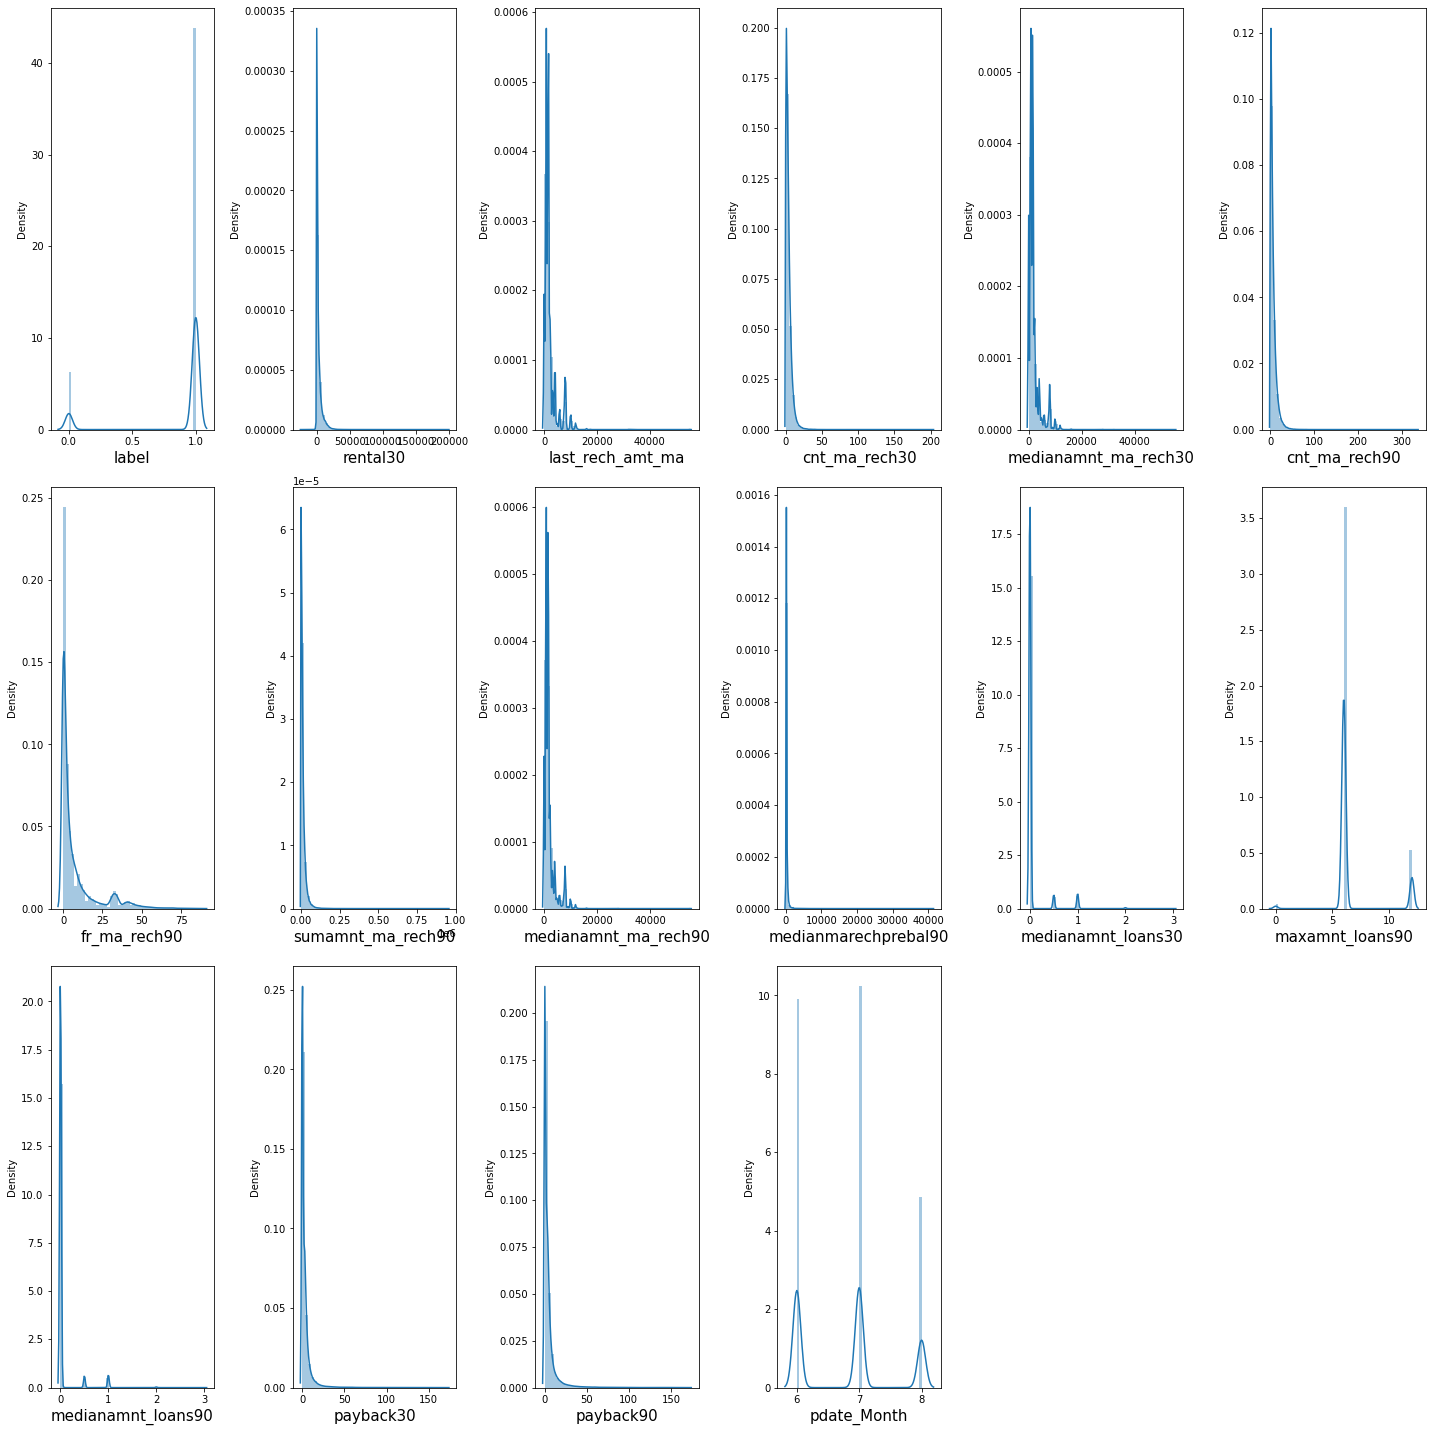

In [122]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=30:
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()  

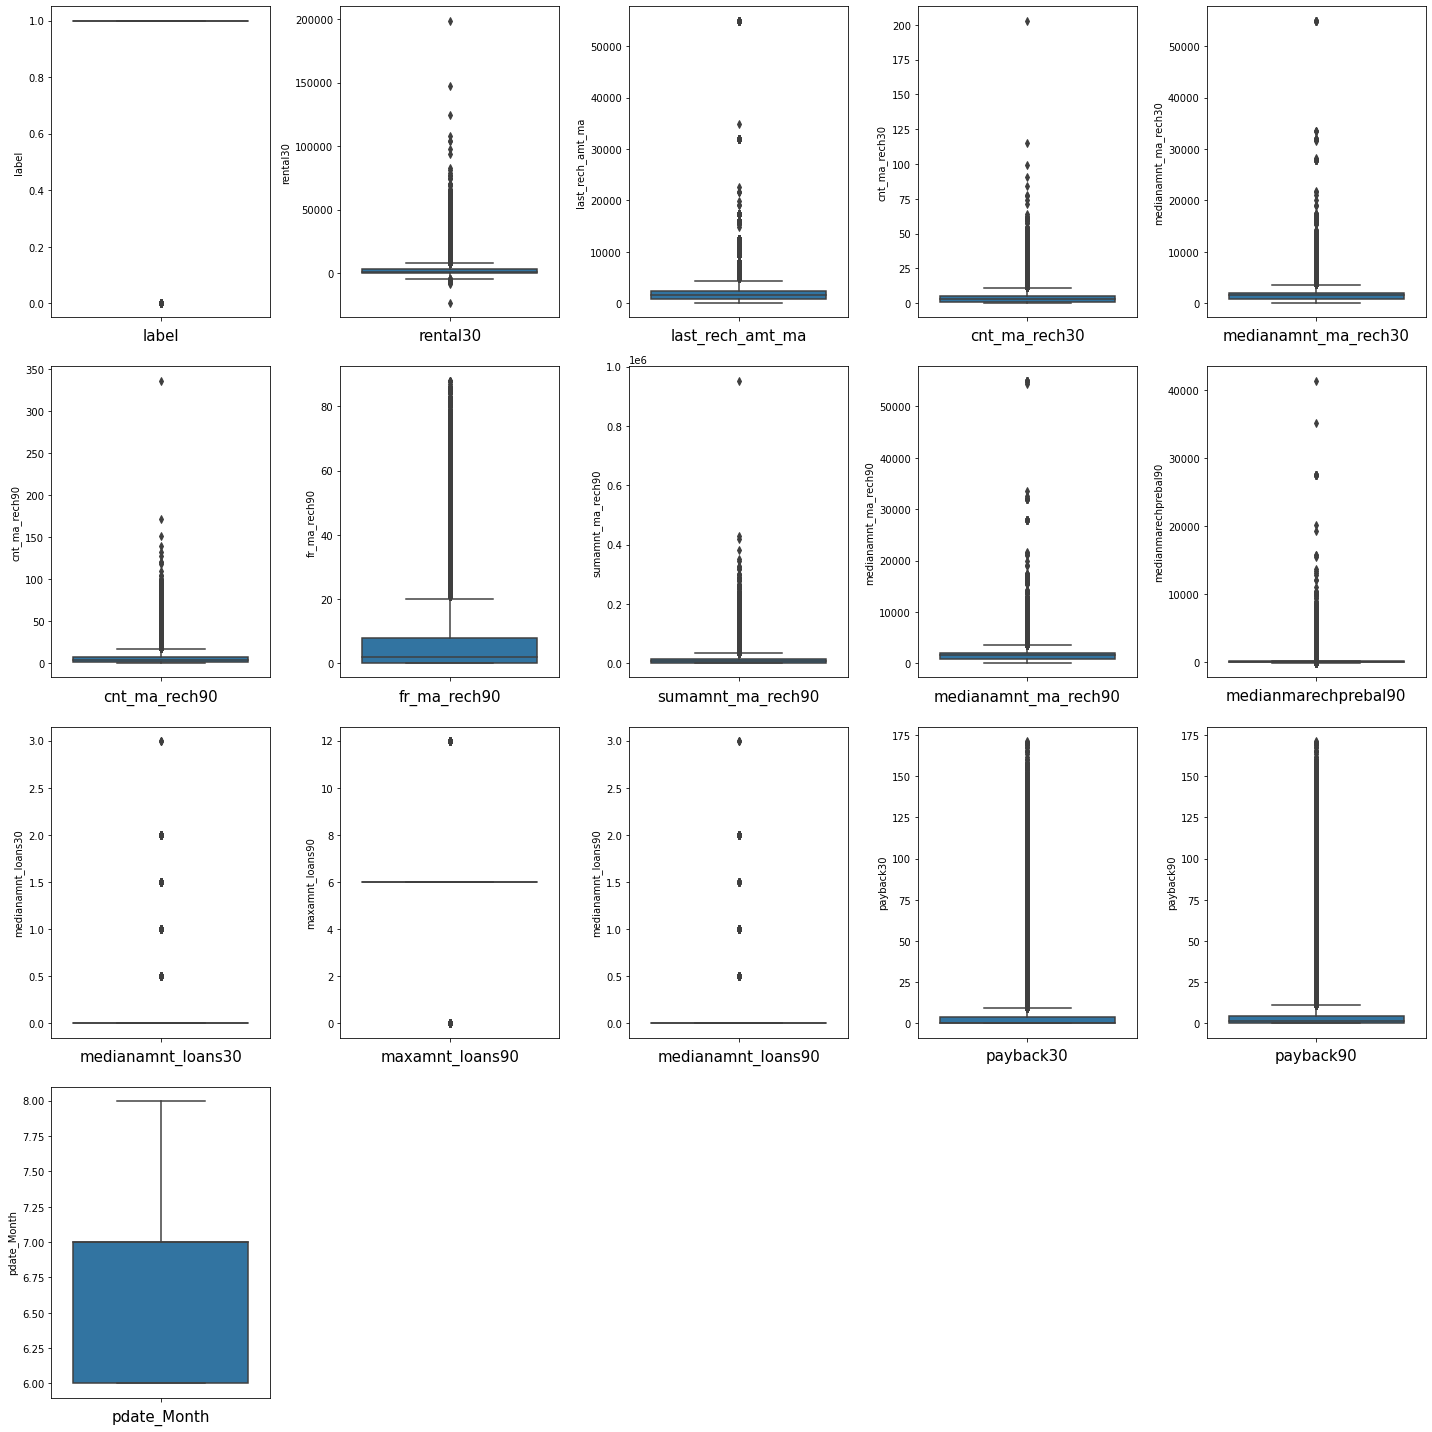

In [123]:
### Will try to see the outliers with boxplots

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(y=df[column],orient="h")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()  

In [170]:
df_test_otliers=df

In [171]:
df_test_otliers.head()

,label,rental30,last_rech_amt_ma,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_Month
0,0,220.13,1539,2,1539.0,2,21,3078,1539.0,7.50,0.0,6,0.0,29.000000,29.000000,7
1,1,3691.26,5787,1,5787.0,1,0,5787,5787.0,61.04,0.0,12,0.0,0.000000,0.000000,8
2,1,900.13,1539,1,1539.0,1,0,1539,1539.0,66.32,0.0,6,0.0,0.000000,0.000000,8
3,1,159.42,947,0,0.0,1,0,947,947.0,2.50,0.0,6,0.0,0.000000,0.000000,6
4,1,1098.90,2309,7,2309.0,8,2,23496,2888.0,35.00,0.0,6,0.0,2.333333,2.333333,6


In [172]:
## Removing extreame outliers
Q1=df_test_otliers['rental30'].quantile(0.10)
Q3=df_test_otliers['rental30'].quantile(0.90)
IQR=Q3-Q1
a=(Q3 + 1.5 * IQR)
index=np.where(df_test_otliers['rental30']>a)
df_test_otliers=df_test_otliers.drop(df_test_otliers.index[index])
df_test_otliers.reset_index()
print('outlier above-',a)
#print('indexs deleetd',index)
print(df_test_otliers.shape)

outlier above- 18238.995000000003
(206988, 16)


In [173]:
print("Percentage of data retained",206988/209593*100)

Percentage of data retained 98.75711497998502


In [174]:
## Removing extreame outliers
Q1=df_test_otliers['last_rech_amt_ma'].quantile(0.10)
Q3=df_test_otliers['last_rech_amt_ma'].quantile(0.90)
IQR=Q3-Q1
a=(Q3 + 1.5 * IQR)
index=np.where(df_test_otliers['last_rech_amt_ma']>a)
df_test_otliers=df_test_otliers.drop(df_test_otliers.index[index])
df_test_otliers.reset_index()
print('outlier above-',a)
#print('indexs deleetd',index)
print(df_test_otliers.shape)

outlier above- 10167.5
(205546, 16)


In [175]:
print("Percentage of data retained",205546/209593*100)

Percentage of data retained 98.0691149036466


In [176]:
## Removing extreame outliers
Q1=df_test_otliers['medianamnt_ma_rech30'].quantile(0.10)
Q3=df_test_otliers['medianamnt_ma_rech30'].quantile(0.90)
IQR=Q3-Q1
a=(Q3 + 1.5 * IQR)
index=np.where(df_test_otliers['medianamnt_ma_rech30']>a)
df_test_otliers=df_test_otliers.drop(df_test_otliers.index[index])
df_test_otliers.reset_index()
print('outlier above-',a)
#print('indexs deleetd',index)
print(df_test_otliers.shape)

outlier above- 10120.0
(205447, 16)


In [177]:
print("Percentage of data retained",205447/209593*100)

Percentage of data retained 98.02188050173432


In [178]:
## Removing extreame outliers
Q1=df_test_otliers['sumamnt_ma_rech90'].quantile(0.10)
Q3=df_test_otliers['sumamnt_ma_rech90'].quantile(0.90)
IQR=Q3-Q1
a=(Q3 + 1.5 * IQR)
index=np.where(df_test_otliers['sumamnt_ma_rech90']>a)
df_test_otliers=df_test_otliers.drop(df_test_otliers.index[index])
df_test_otliers.reset_index()
print('outlier above-',a)
#print('indexs deleetd',index)
print(df_test_otliers.shape)

outlier above- 71310.0
(203104, 16)


In [179]:
print("Percentage of data retained",203104/209593*100)

Percentage of data retained 96.90399965647708


In [180]:
#### Removing extreame outliers
Q1=df_test_otliers['medianamnt_ma_rech90'].quantile(0.10)
Q3=df_test_otliers['medianamnt_ma_rech90'].quantile(0.90)
IQR=Q3-Q1
a=(Q3 + 1.5 * IQR)
index=np.where(df_test_otliers['medianamnt_ma_rech90']>a)
df_test_otliers=df_test_otliers.drop(df_test_otliers.index[index])
df_test_otliers.reset_index()
print('outlier above-',a)
#print('indexs deleetd',index)
print(df_test_otliers.shape)

outlier above- 10120.0
(203029, 16)


In [181]:
print("Percentage of data retained",203029/209593*100)

Percentage of data retained 96.86821601866474


In [182]:
#### Removing extreame outliers
Q1=df_test_otliers['medianmarechprebal90'].quantile(0.10)
Q3=df_test_otliers['medianmarechprebal90'].quantile(0.90)
IQR=Q3-Q1
a=(Q3 + 1.5 * IQR)
index=np.where(df_test_otliers['medianmarechprebal90']>a)
df_test_otliers=df_test_otliers.drop(df_test_otliers.index[index])
df_test_otliers.reset_index()
print('outlier above-',a)
#print('indexs deleetd',index)
print(df_test_otliers.shape)

outlier above- 486.25
(198020, 16)


In [183]:
print("Percentage of data retained",198020/209593*100)

Percentage of data retained 94.47834612797183


In [184]:
#### Removing extreame outliers
Q1=df_test_otliers['payback30'].quantile(0.10)
Q3=df_test_otliers['payback30'].quantile(0.90)
IQR=Q3-Q1
a=(Q3 + 1.5 * IQR)
index=np.where(df_test_otliers['payback30']>a)
df_test_otliers=df_test_otliers.drop(df_test_otliers.index[index])
df_test_otliers.reset_index()
print('outlier above-',a)
#print('indexs deleetd',index)
print(df_test_otliers.shape)

outlier above- 20.0
(192800, 16)


In [185]:
print("Percentage of data retained",192800/209593*100)

Percentage of data retained 91.98780493623356


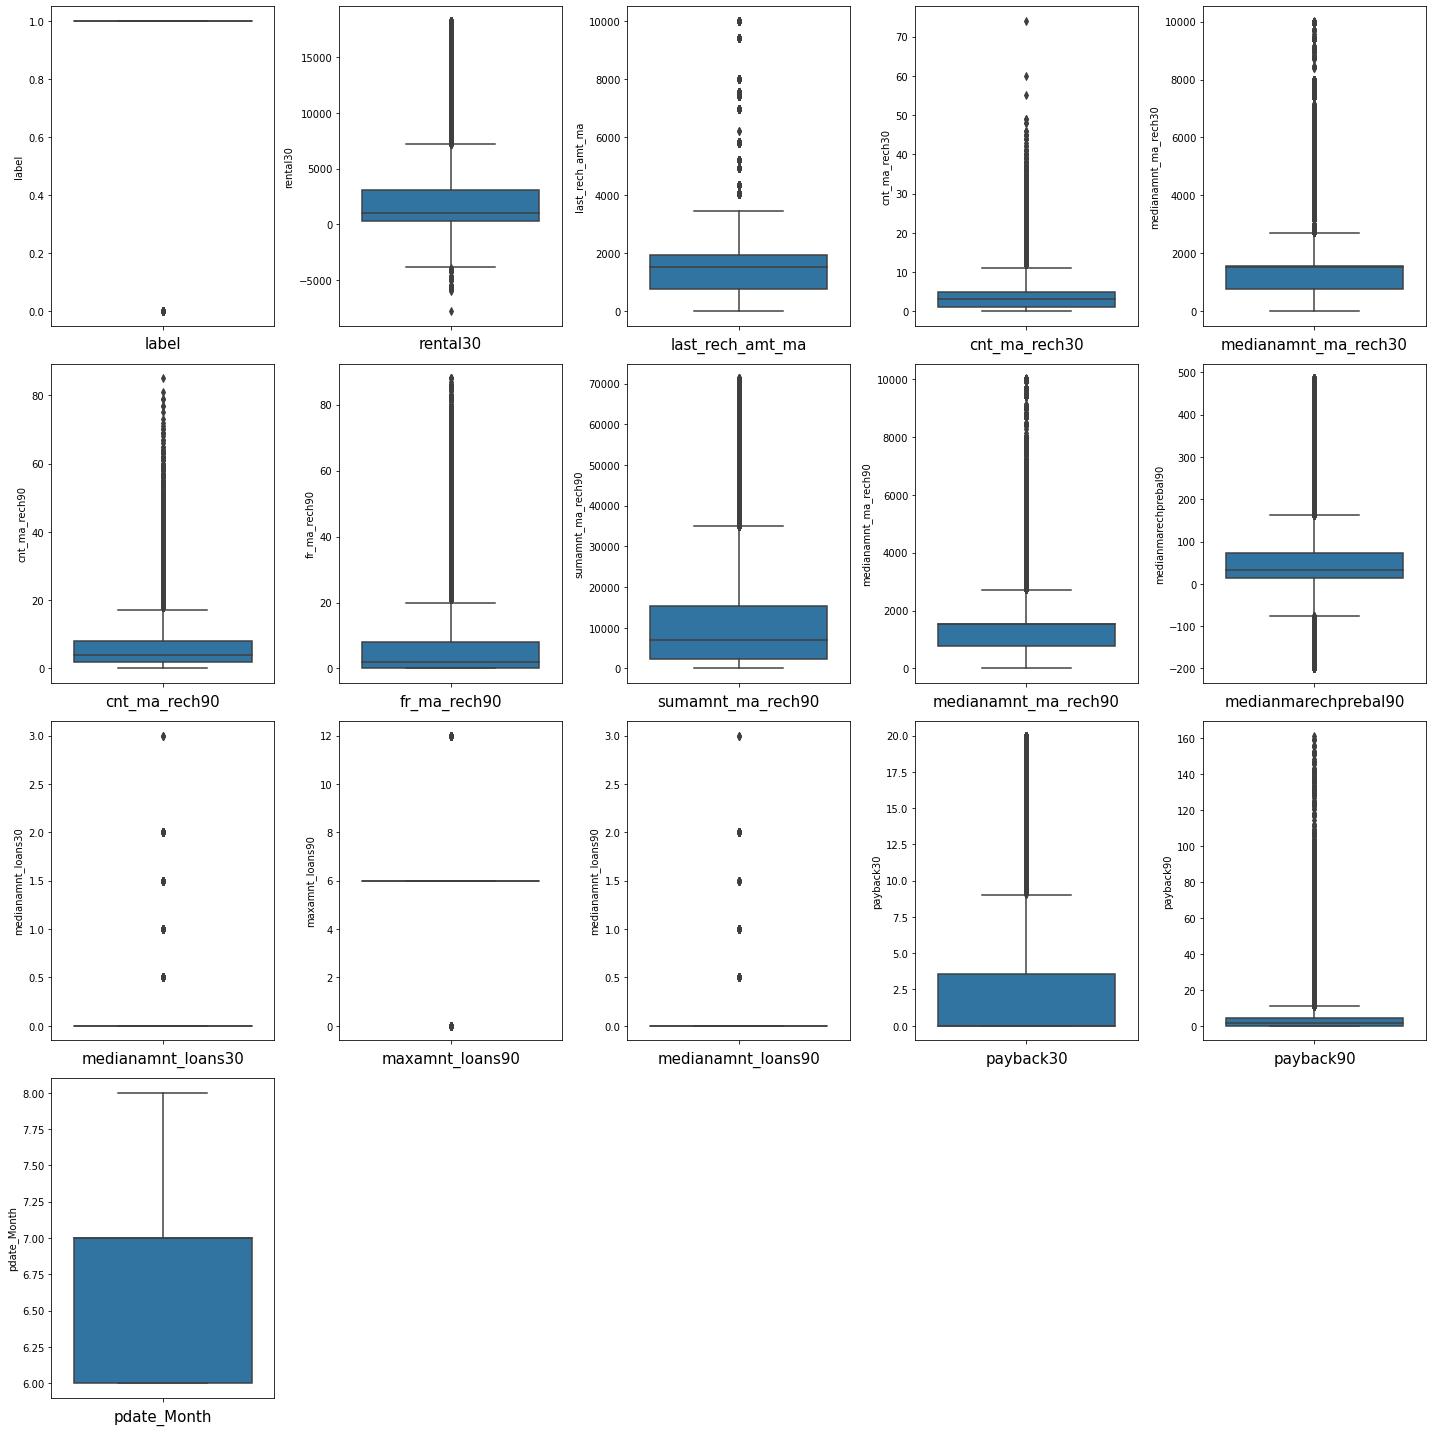

In [186]:

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_test_otliers:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(y=df_test_otliers[column],orient="h")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()  

In [188]:
## geting the cleaned valuesa back to the dataframe

df=df_test_otliers

In [189]:
df.skew()

label                  -2.222132
rental30                2.216289
last_rech_amt_ma        2.177281
cnt_ma_rech30           2.216656
medianamnt_ma_rech30    2.403110
cnt_ma_rech90           2.260058
fr_ma_rech90            2.260892
sumamnt_ma_rech90       1.859509
medianamnt_ma_rech90    2.436796
medianmarechprebal90    2.226536
medianamnt_loans30      4.610200
maxamnt_loans90         1.795317
medianamnt_loans90      4.985104
payback30               2.065142
payback90               7.800707
pdate_Month             0.380448
dtype: float64

In [190]:
x=df.drop(columns=['label'],axis=1)
y=df['label']


In [191]:
## Will do power trasformation to this data
#Screwness Correction
from sklearn.preprocessing import power_transform
x=power_transform(x)


In [192]:
##checking for balance in the Y label to feed to the ML
y.value_counts()
#IMBALNCE DATA

1    168052
0     24748
Name: label, dtype: int64

In [193]:
#As the Label is imbalance, Will balance it using SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE(0.8,k_neighbors=5)
x_smoted, y_smoted=oversample.fit_resample(x,y)
# summarize distribution
counter = y_smoted.value_counts()
for k,v in counter.items():
    per = v / len(y_smoted) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
#THE dataSET IS BALANCED NOW, 

Class=1, n=168052 (55.556%)
Class=0, n=134441 (44.444%)


In [194]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_smoted)
x_scaled.shape

(302493, 15)

In [195]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y_smoted,test_size=0.25, random_state=100)

In [196]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [206]:
### Classification report- Which gives accuracy, precision, F1 score

print(classification_report(y_test,y_pred,digits=2))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     33812
           1       0.91      0.92      0.92     41812

    accuracy                           0.91     75624
   macro avg       0.91      0.90      0.91     75624
weighted avg       0.91      0.91      0.91     75624

[[30067  3745]
 [ 3327 38485]]


In [207]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(x_train,y_train)
y_pred=LG.predict(x_test)

In [208]:
### Classification report- Which gives accuracy, precision, F1 score

print(classification_report(y_test,y_pred,digits=2))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     33812
           1       0.79      0.79      0.79     41812

    accuracy                           0.77     75624
   macro avg       0.76      0.76      0.76     75624
weighted avg       0.77      0.77      0.77     75624

[[25141  8671]
 [ 8976 32836]]


In [209]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [210]:
print(classification_report(y_test,y_pred,digits=2))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     33812
           1       0.94      0.81      0.87     41812

    accuracy                           0.87     75624
   macro avg       0.87      0.87      0.87     75624
weighted avg       0.88      0.87      0.87     75624

[[31670  2142]
 [ 7948 33864]]


In [211]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [212]:
print(classification_report(y_test,y_pred,digits=2))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     33812
           1       0.89      0.87      0.88     41812

    accuracy                           0.87     75624
   macro avg       0.87      0.87      0.87     75624
weighted avg       0.87      0.87      0.87     75624

[[29315  4497]
 [ 5352 36460]]


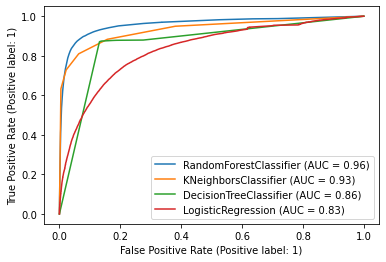

In [214]:

#ROC CURVE COMPARING WITH OTHER MODELS
from sklearn.metrics import plot_roc_curve

classifiers = [RF,knn,clf,LG, ]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax)

## RANDOM FOREST IS SELECTED

### CROSSVALIDATION TO CHECK FOR OVERFITTING/UNDERFITTING ASPECTS OF THE MODEL


In [217]:
#Cross Validation
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f

from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    x_train , x_test = x_scaled[train_index,:],x_scaled[test_index,:]
    y_train , y_test = y_smoted[train_index] , y_smoted[test_index]
     
    RF.fit(x_train,y_train)
    pred_values = RF.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print(classification_report(y_test,pred_values,digits=2))

accuracy of each fold - [0.6408390603074616, 0.6317110837731179, 0.6435724768544693, 0.6396031827261952, 0.639250733276685]
Avg accuracy : 0.6389953073875858
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     26969
           1       0.91      0.93      0.92     33529

    accuracy                           0.91     60498
   macro avg       0.91      0.91      0.91     60498
weighted avg       0.91      0.91      0.91     60498



## Accuracy is not the correct Metrics for Classification Matric
## I would prefer to go with Classication report


In [218]:
print(confusion_matrix(y_test,pred_values))

[[24081  2888]
 [ 2504 31025]]


In [219]:
## CONFUSION MATRICS also is Okay where FP, FN is less 

In [220]:
with open("RF", "wb") as f:
    pickle.dump(RF, f)